
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







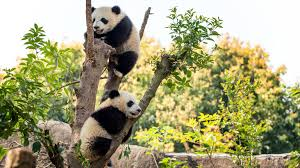


In [216]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [217]:
! git clone https://github.com/nhsengland/Digdata

fatal: destination path 'Digdata' already exists and is not an empty directory.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [218]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [219]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

In [220]:
# Checking data info
pca_regional_drug_summary_df.head(5)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


In [221]:
# Checking data info
pca_regional_summary_df.head(5)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70


In [222]:
#Checking datatype and nulls
pca_regional_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR_MONTH   322 non-null    int64  
 1   REGION_NAME  322 non-null    object 
 2   ITEMS        322 non-null    int64  
 3   COST         322 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.2+ KB


In [223]:
#Checking datatype and nulls
pca_regional_drug_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9455 entries, 0 to 9454
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YEAR                    9455 non-null   int64  
 1   YEAR_MONTH              9455 non-null   int64  
 2   REGION_NAME             9455 non-null   object 
 3   BNF_CHEMICAL_SUBSTANCE  9455 non-null   object 
 4   ITEMS                   9455 non-null   int64  
 5   COST                    9455 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 443.3+ KB


#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [224]:
top_drugs_2024= pca_regional_drug_summary_df
top_10_drugs = top_drugs_2024.groupby(['BNF_CHEMICAL_SUBSTANCE'])['ITEMS'].sum()
top_10_drugs.sort_values(ascending=False).head(10)

,ITEMS
BNF_CHEMICAL_SUBSTANCE,
Sertraline hydrochloride,85402251
Amitriptyline hydrochloride,59272937
Citalopram hydrobromide,52891620
Mirtazapine,46335570
Fluoxetine hydrochloride,28211759
Venlafaxine,21447209
Duloxetine hydrochloride,14262656
Escitalopram,6580386
Paroxetine hydrochloride,4886615


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [225]:
avg = {'COST': 'mean'}
mirtza_pres = pca_regional_drug_summary_df.query('BNF_CHEMICAL_SUBSTANCE == "Mirtazapine"').groupby(['YEAR_MONTH']).agg(avg).sort_values(by=['YEAR_MONTH'], ascending=False)
display(mirtza_pres)

,COST
YEAR_MONTH,
202410,186041.921429
202409,184576.250000
202408,188432.015714
202407,211378.657143
202406,170878.722857
202405,183985.027143
202404,179961.982857
202403,172420.918571
202402,171031.518571


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [226]:
sert_mid = pca_regional_drug_summary_df[(pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == "Sertraline hydrochloride") & (pca_regional_drug_summary_df['REGION_NAME'] == "MIDLANDS")].groupby(['YEAR'])['COST'].sum()
display(sert_mid)


,COST
YEAR,
2021,17477276.46
2022,6433863.59
2023,7600322.04
2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

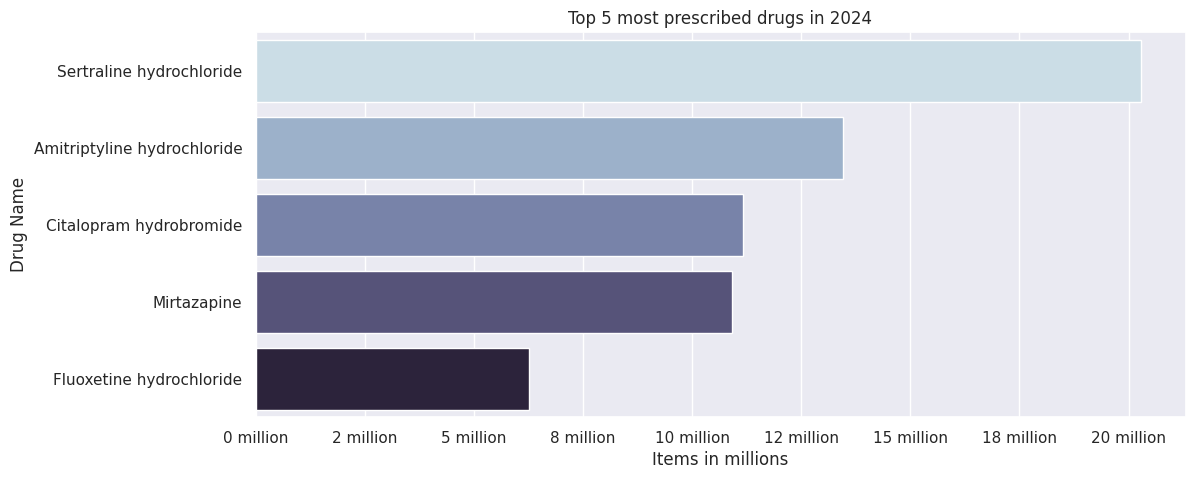

In [228]:
import matplotlib.ticker as ticker

def formatter(x, pos):
    return str(round(x / 1e6,)) + " million"

df_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df['YEAR'] == 2024]
top_drugs_2024 = df_2024.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(5)
sns.set(rc={'figure.figsize':(12,5)})
fig, ax = plt.subplots()
sns.barplot(x=top_drugs_2024.values, y=top_drugs_2024.index, orient='h', palette="ch:s=.25,rot=-.25", hue=top_drugs_2024.index, legend=False)
plt.xlabel('Items in millions')
plt.ylabel('Drug Name')
ax.xaxis.set_major_formatter(formatter)

plt.title('Top 5 most prescribed drugs in 2024')
plt.show()

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


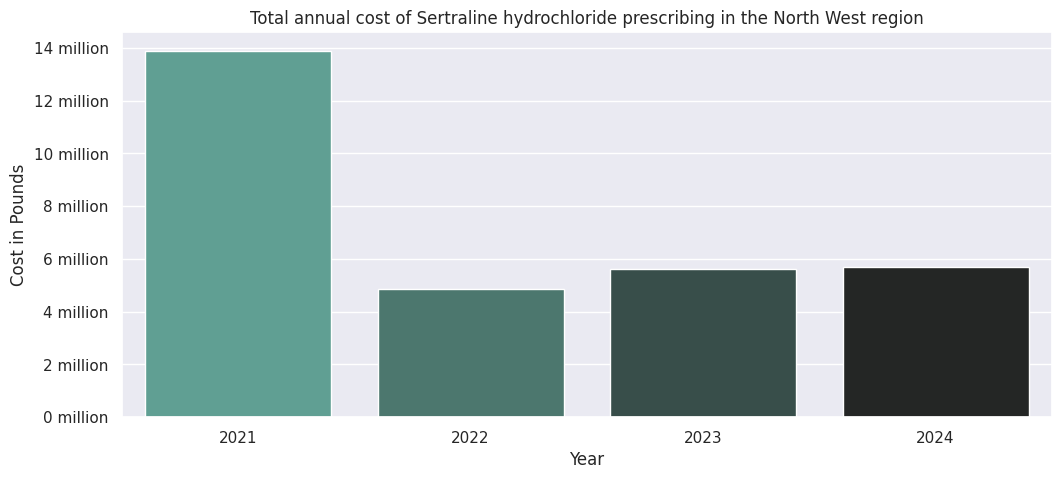

In [229]:
import matplotlib.ticker as ticker

def formatter(x, pos):
    return str(round(x / 1e6,)) + " million"

sns.set(rc={'figure.figsize':(12,5)})
fig, ax = plt.subplots()
df_nw = pca_regional_drug_summary_df[(pca_regional_drug_summary_df['REGION_NAME'] == 'NORTH WEST') & (pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == 'Sertraline hydrochloride')]
df_nw = df_nw.groupby(['YEAR']).sum()
df_nw_year = df_nw.groupby('YEAR')['COST'].sum().sort_values(ascending=False)

sns.barplot(x=df_nw_year.index, y=df_nw_year.values, palette="dark:#5A9_r", hue=df_nw_year.index, legend=False)
plt.xlabel('Year')
plt.ylabel('Cost in Pounds')
plt.title('Total annual cost of Sertraline hydrochloride prescribing in the North West region')
ax.yaxis.set_major_formatter(formatter)
plt.show()

In [230]:
pca_regional_drug_summary_df.head()

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72








### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.




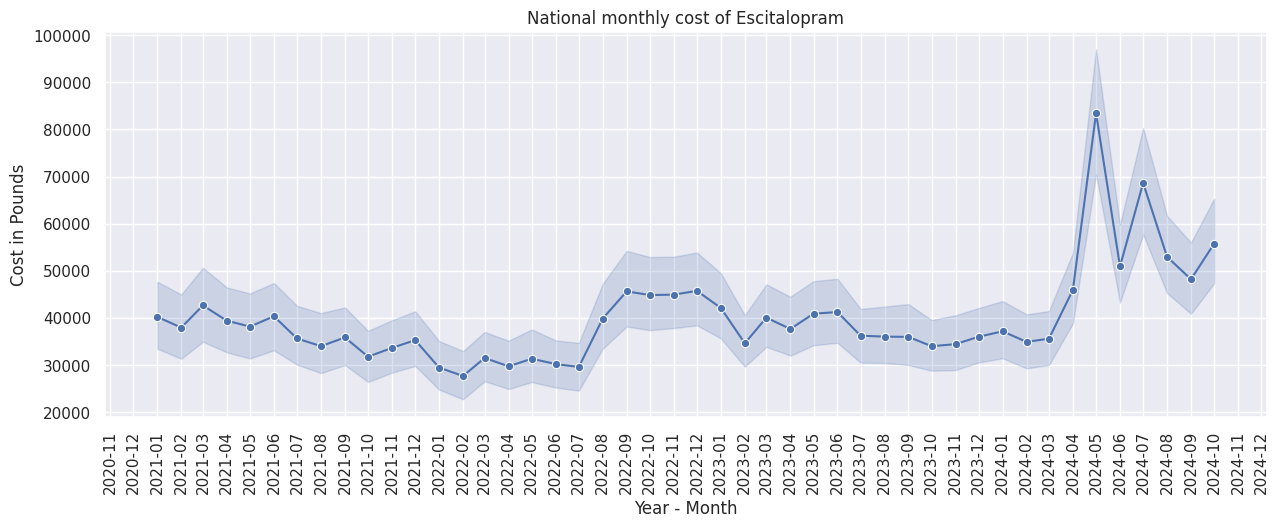

In [231]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

nat_mon_cost = pca_regional_drug_summary_df
nat_mon_cost['YEAR_MONTH'] = pd.to_datetime(nat_mon_cost['YEAR_MONTH'], format = "%Y%m")
nat_mon_cost.set_index('YEAR_MONTH', inplace=True)
nat_mon_cost['COST'] = nat_mon_cost['COST'].round(0)
monthly_esci = nat_mon_cost[(nat_mon_cost['BNF_CHEMICAL_SUBSTANCE'] == 'Escitalopram')]

sns.set(rc={'figure.figsize':(15,5)})
fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(x=monthly_esci.index, y='COST', data=monthly_esci, marker='o', ax=ax)
plt.xlabel('Year - Month')
plt.ylabel('Cost in Pounds')
plt.title('National monthly cost of Escitalopram')

# Ensure every month is shown
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

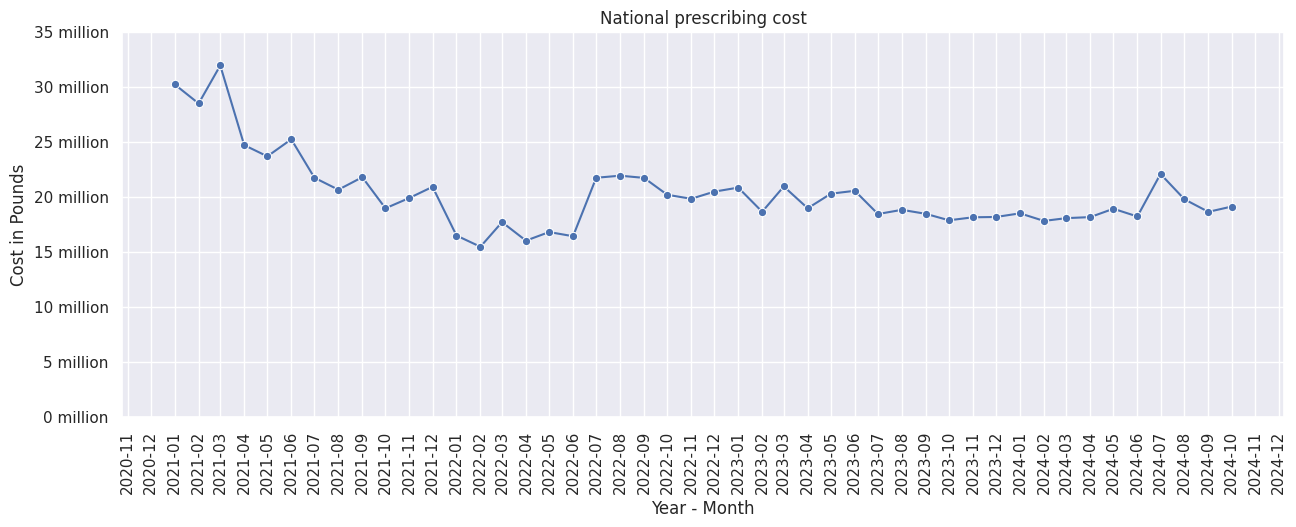

In [232]:
def formatter(x, pos):
    return str(round(x / 1e6,)) + " million"

nat_cost = pca_regional_drug_summary_df
nat_cost = nat_cost.groupby(['YEAR_MONTH']).sum()
nat_cost['YEAR_MONTH'] = pd.to_datetime(nat_cost.index, format='%Y%m')
nat_cost.set_index('YEAR_MONTH', inplace=True)

sns.set(rc={'figure.figsize':(15,5)})
fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(x=nat_cost.index, y='COST', data=nat_cost, marker='o', ax=ax)
plt.xlabel('Year - Month')
plt.ylabel('Cost in Pounds')
plt.title('National prescribing cost')

# Ensure every month is shown
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.ylim(0,3.5e7)
plt.grid(True)
plt.show()

### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [233]:
nat_cost['COST'].describe().astype(int)

,COST
count,46
mean,20259788
std,3407565
min,15453988
25%,18172619
50%,19437433
75%,21519457
max,31933604



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

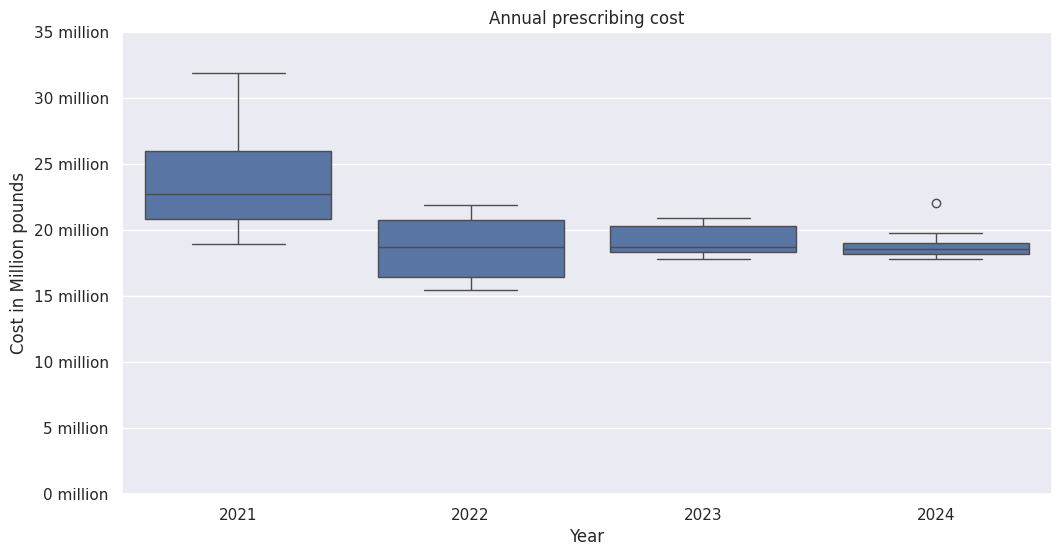

In [234]:
def formatter(x, pos):
    return str(round(x / 1e6,)) + " million"

nat_cost_year = nat_cost.reset_index()
nat_cost_year['YEAR'] = nat_cost_year['YEAR_MONTH'].dt.year

plt.figure(figsize=(12,6))
ax = sns.boxplot(data = nat_cost_year, x='YEAR', y='COST')
plt.ylim(0,3.5e7)
plt.ylabel('Cost in Million pounds')
plt.xlabel('Year')
plt.title('Annual prescribing cost')
ax.yaxis.set_major_formatter(formatter)
plt.show()

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

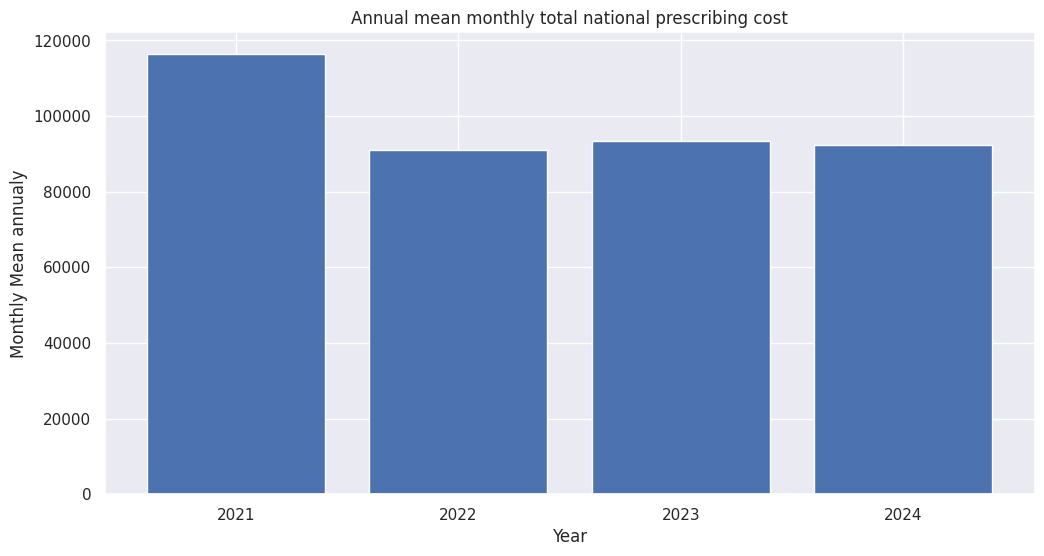

In [235]:
annual_mean_cost = pca_regional_drug_summary_df.reset_index()
annual_mean_cost = annual_mean_cost.groupby(annual_mean_cost['YEAR_MONTH'].astype(str).str[:4])['COST'].mean()
plt.figure(figsize=(12,6))
plt.bar(annual_mean_cost.index, annual_mean_cost.values)
plt.ylabel('Monthly Mean annualy')
plt.xlabel('Year')
plt.title('Annual mean monthly total national prescribing cost')
plt.show()

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [236]:
#pca_regional_drug_summary_df.head()
pd.pivot_table(pca_regional_drug_summary_df, index = 'YEAR', columns ='REGION_NAME', values = 'COST', aggfunc='sum')

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549429.0,31640431.0,54008250.0,54219517.0,41951037.0,44230475.0,29500096.0
2022,25646508.0,25262958.0,42218781.0,41628526.0,31645818.0,35263814.0,22982040.0
2023,26095462.0,26264844.0,43734608.0,43117420.0,32223277.0,35320641.0,23257407.0
2024,21556931.0,21338159.0,36140491.0,36540047.0,26356577.0,28686319.0,18570407.0


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

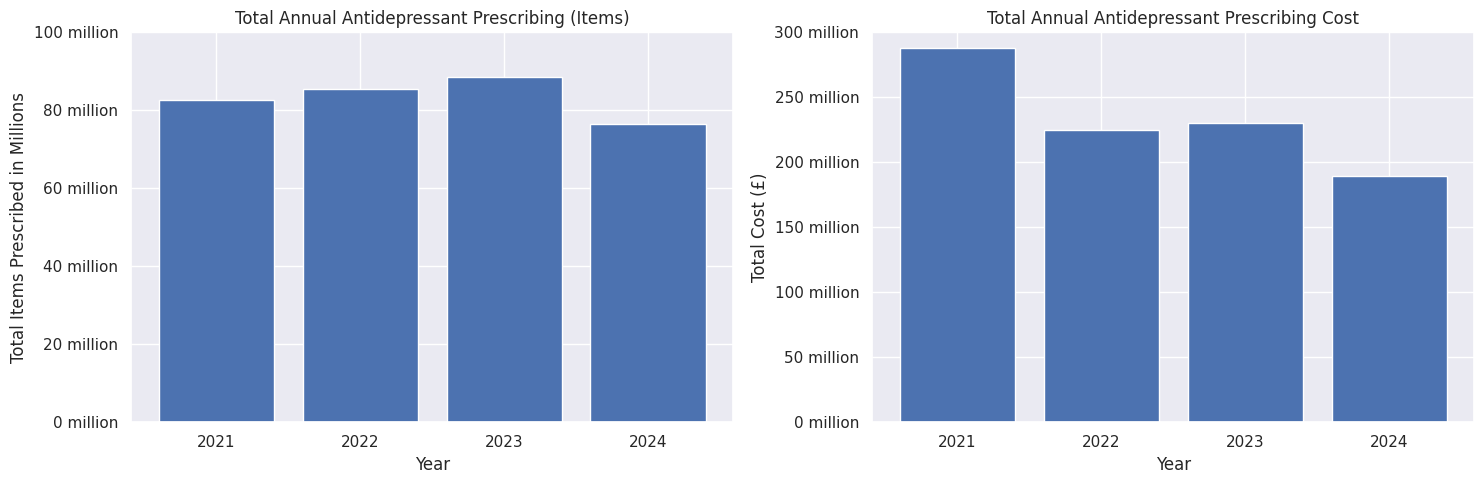

In [237]:
#Part 1, charts 1
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6,)) + " million"

annual_items = pca_regional_drug_summary_df.groupby('YEAR')['ITEMS'].sum()
annual_items.values.astype(int)
annual_cost = pca_regional_drug_summary_df.groupby('YEAR')['COST'].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart for total annual Antidepressant prescribing (by items)
axes[0].bar(annual_items.index, annual_items.values)
axes[0].set_xlabel('Year')
axes[0].locator_params(integer=True)
axes[0].set_ylim(0,100e6)
axes[0].set_ylabel('Total Items Prescribed in Millions')
axes[0].set_title('Total Annual Antidepressant Prescribing (Items)')
axes[0].yaxis.set_major_formatter(formatter)
axes[0].yaxis.set_minor_formatter(NullFormatter())

# Bar chart for total Antidepressant prescribing cost
axes[1].bar(annual_cost.index, annual_cost.values)
axes[1].set_xlabel('Year')
axes[1].locator_params(integer=True)
axes[1].set_ylabel('Total Cost (£)')
axes[1].set_ylim(0,300e6)
axes[1].set_title('Total Annual Antidepressant Prescribing Cost')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_minor_formatter(NullFormatter())

plt.tight_layout()
plt.show()

# Analysis
Looking at the above data, the total cost of Antidepressant prescribing has decreased from 2021 to its lowest in 2024, where it was less than 20 Million pounds. But the total number of drug had a drop of just about 10%, indicating that the manufacturing of these drugs is now cheaper, although the data is available for only first 10 months of 2024. This is evident from the highest prescriptions in 2023, but the total cost was similar to 2022.

In [238]:
#Part 1, chart 2
# Create a table showing the total annual antidepressant prescribing per region (items)
annual_regional_items = pca_regional_drug_summary_df.groupby(['YEAR', 'REGION_NAME'])['ITEMS'].sum().unstack()
display(annual_regional_items)

# Create a table showing the annual antidepressant prescribing cost per region
annual_regional_cost = pca_regional_drug_summary_df.groupby(['YEAR', 'REGION_NAME'])['COST'].sum().unstack()
display((annual_regional_cost).astype(int))

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,9663288,8599587,15375576,17676819,12417071,10596746,8291455
2022,9887496,9255871,16066881,18255050,12779874,10804393,8355297
2023,10167005,9758068,16751001,19026635,13210529,11045891,8510674
2024,8713529,8282759,14476095,17131959,11378542,9420102,7179388


REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,32549429,31640431,54008250,54219517,41951037,44230475,29500096
2022,25646508,25262958,42218781,41628526,31645818,35263814,22982040
2023,26095462,26264844,43734608,43117420,32223277,35320641,23257407
2024,21556931,21338159,36140491,36540047,26356577,28686319,18570407


# From the tables, the data shows that


*   East england has a surge in Antidepressants from 2021 to 2023 but the cost of these drugs has been reducing over this period.
*   North East and Yorkshire  have the most of number of Antidepressants prescribed in this duration.

*   South West has the lowest number of Antidepressant prescribed but the trend is similar to other regions where it increases every year.
*   Similar items, the total prices have been highest in North East and Yorkshire  and lowest in South West.


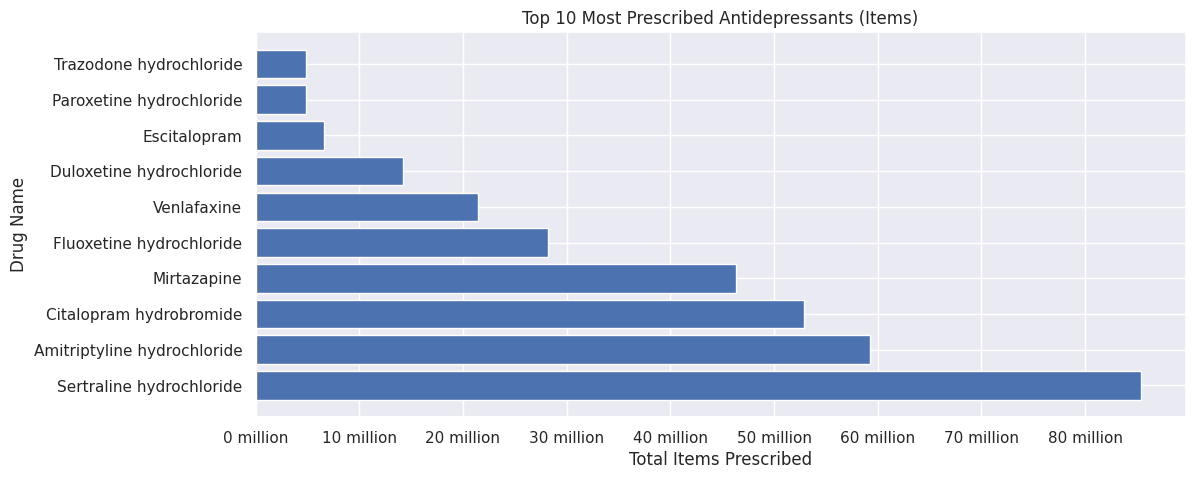

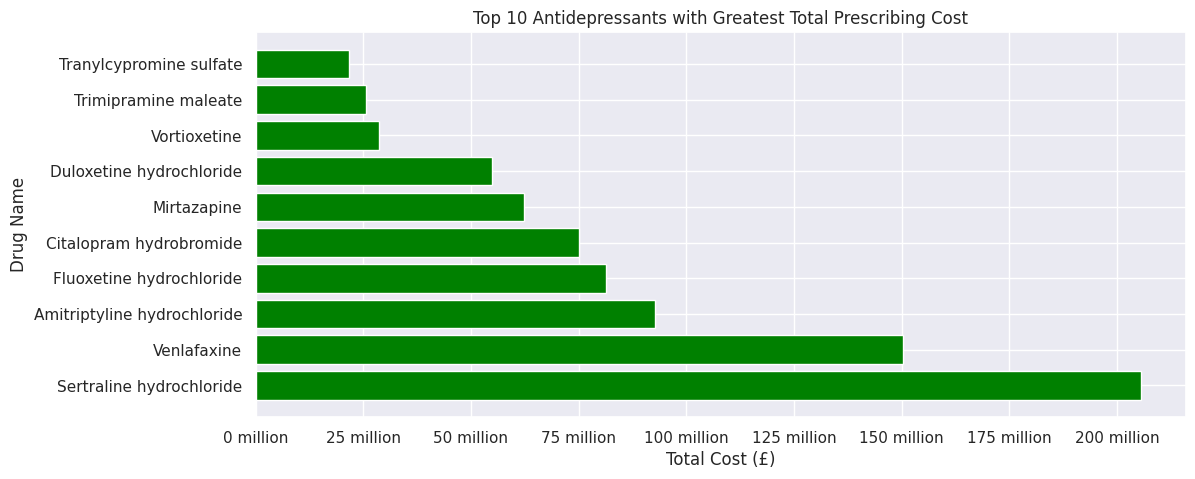

In [239]:
#Part 1 Chart 3

def formatter(x, pos):
    return str(round(x / 1e6,)) + " million"

top_10_drugs_items = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(10)
top_10_drugs_cost = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum().sort_values(ascending=False).head(10)

fig1, ax = plt.subplots(figsize=(12, 5))

# Horizontal bar chart for top 10 most prescribed antidepressants (items)
ax.barh(top_10_drugs_items.index, top_10_drugs_items.values)
ax.set_xlabel('Total Items Prescribed')
ax.set_ylabel('Drug Name')
ax.set_title('Top 10 Most Prescribed Antidepressants (Items)')
ax.xaxis.set_major_formatter(FuncFormatter(formatter))

# Horizontal bar chart for top 10 antidepressants with greatest total prescribing cost
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.barh(top_10_drugs_cost.index, top_10_drugs_cost.values, color='green')
ax2.set_xlabel('Total Cost (£)')
ax2.set_ylabel('Drug Name')
ax2.set_title('Top 10 Antidepressants with Greatest Total Prescribing Cost')
ax2.xaxis.set_major_formatter(FuncFormatter(formatter))

plt.show()

# Analysis  

*  Sertraline hydrochloride is the most prescribed drugs by item quantity and by total cost
*   Venlafaxine is the second most prescribed by cost, despite having a less prescriptions in terms of item quantity, indicating to have a high price.
* Trimipramime maleate, Tranylcypromine sulfate and Vortixetine appear among highest total cost but are not among top prescribed drugs by quantity.   
* Trazodone Hydrochloride, Paroxetine hydrocholride and Escitalopram are among top prescribed drugs but not by cost, likely due to low price per item
*  Some drugs appear in both top 10 charts, which suggests their high usage and cost.
*   There are drugs that appear only in one chart, highlighting the significance of looking at both volume and cost when analyzing drug use patterns.











## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.


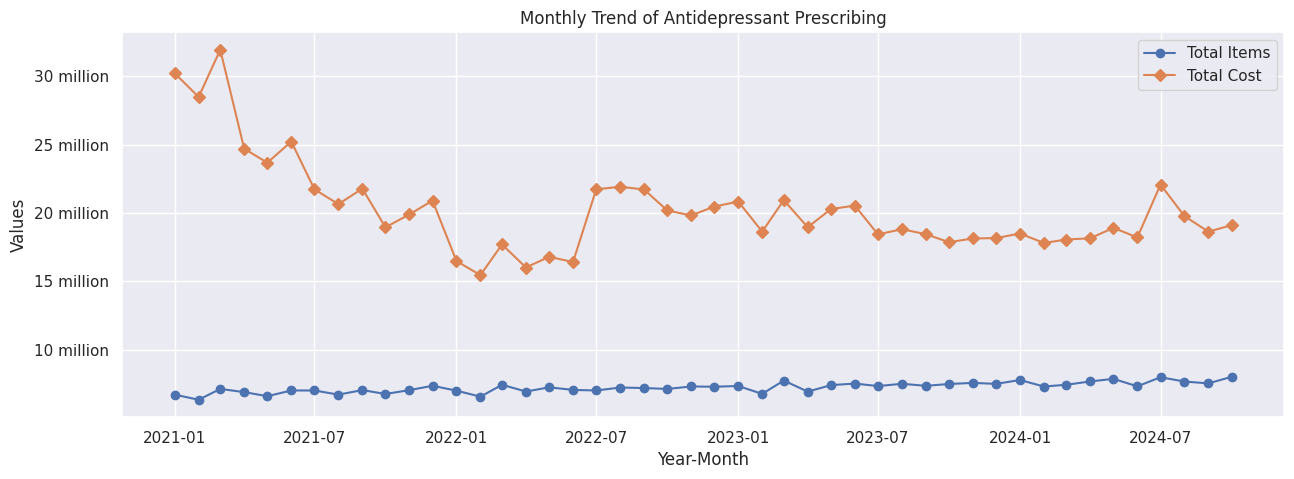

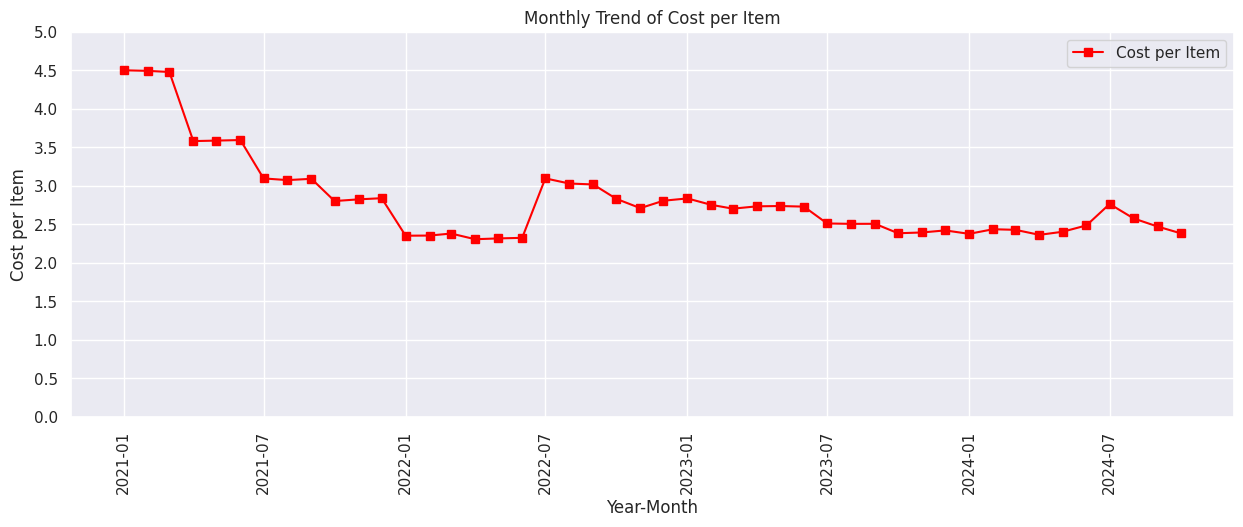

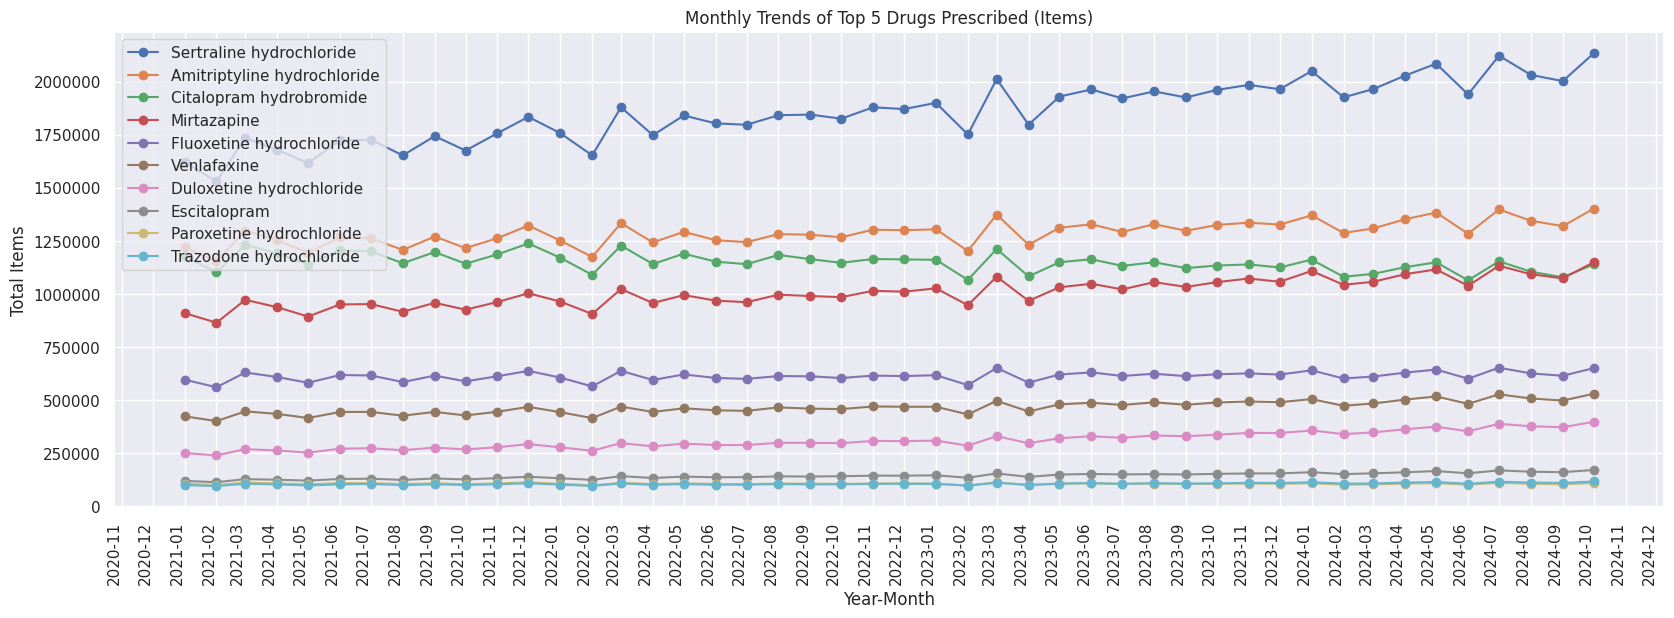

In [240]:
# Part 2
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6,)) + " million"

def full_formatter(x, pos):
    return str(int(x))

# Analyzing Monthly Trends and per item value
monthly_items = pca_regional_drug_summary_df.groupby('YEAR_MONTH')['ITEMS'].sum()
monthly_cost = pca_regional_drug_summary_df.groupby('YEAR_MONTH')['COST'].sum()
cost_per_item = monthly_cost / monthly_items


# Converting YEAR_MONTH to date time objects for plotting
monthly_items.index = pd.to_datetime(monthly_items.index, format='%Y%m')
monthly_cost.index = pd.to_datetime(monthly_cost.index, format='%Y%m')

# Plotting Monthly Trends
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(monthly_items.index, monthly_items.values, label='Total Items', marker = 'o')
plt.plot(monthly_cost.index, monthly_cost.values, label='Total Cost', marker = 'D')
plt.xlabel('Year-Month')
plt.ylabel('Values')
ax.yaxis.set_major_formatter(FuncFormatter(formatter))
plt.title('Monthly Trend of Antidepressant Prescribing')
plt.legend()
plt.show()

#Cost per item
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(cost_per_item.index, cost_per_item.values, label='Cost per Item', marker='s', color='red')
plt.xlabel('Year-Month')
plt.ylabel('Cost per Item')
plt.title('Monthly Trend of Cost per Item')
plt.yticks(np.arange(0, 5.5, 0.5))
plt.xticks(rotation=90)
plt.legend()
plt.show()

drug_items = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum()
drug_cost = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['COST'].sum()

# Find the top 10 drugs by items and cost
top_10_drugs_items = drug_items.sort_values(ascending=False).head(10)
top_10_drugs_cost = drug_cost.sort_values(ascending=False).head(10)

# Analyze the monthly trend for the top 10 drugs by items and cost
top_10_drugs = top_10_drugs_items.index[:10]

fig, ax = plt.subplots(figsize=(20, 7))
# Loop over the top 5 drugs and plot each one
for drug in top_10_drugs:
    # Filter the data for the current drug and group by 'YEAR_MONTH'
    monthly_drug_items = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE'] == drug].groupby('YEAR_MONTH')['ITEMS'].sum()

    # Plot the trend for this drug
    plt.plot(monthly_drug_items.index, monthly_drug_items.values, marker='o', label=drug)

# Plot details
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gcf().autofmt_xdate()
plt.xlabel('Year-Month')
plt.ylabel('Total Items')
ax.yaxis.set_major_formatter(FuncFormatter(full_formatter))
plt.title('Monthly Trends of Top 5 Drugs Prescribed (Items)')
plt.xticks(rotation=90)
plt.legend(loc = 0)
plt.show()

# Analysis



*   It is clear from the first plot that there has been significant surge in Antidepressants in this time period indicating the increasing mental health struggles among people since pandemic.
* Despite the increase in prescription, total cost/item of Antidepressants have dropped from 4.5 to 2.5
*   All the top 10 drugs have seen an increase in monthly prescription from 2021 to 2024.
* Every year during the month of March there is a surge in prescriptions.



## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus one one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.

